In [81]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from astropy.convolution import convolve
import scipy.stats
from tqdm import tqdm
from skimage.restoration import denoise_tv_bregman
from numpy.linalg import norm
import scipy
import bm3d

In [82]:
def interpolate_nn(data: np.array) -> np.array:
    """
    Function to fill nan values in a 2D array using nearest neighbor
    interpolation.

    Source: https://stackoverflow.com/a/27745627
    """
    ind = nd.distance_transform_edt(np.isnan(data),
                                    return_distances=False,
                                    return_indices=True)
    return data[tuple(ind)]


# Ouverture des fichiers 


In [83]:
filename_out_0 = "Hangzhou_032018_022019_Orb_Stack.tif"
filename_out_1 = "Hangzhou_032018_062019_Orb_Stack.tif"
filename_out_2 = "Hangzhou_032018_042020_Orb_Stack.tif"
filename_out_3 = "Hangzhou_032018_022021_Orb_Stack.tif"

image0 = tifffile.imread(filename_out_0)
image1 = tifffile.imread(filename_out_1)
image2 =tifffile.imread(filename_out_2)
image3 =tifffile.imread(filename_out_3)


In [84]:

image_1 = image0[0,:,:] + 1j*image0[1,:,:] #03/2018

image_2 = image2[2,:,:] + 1j*image2[3,:,:] #02/2019

image_3 = image1[2,:,:] + 1j*image1[3,:,:] #06/2019

image_4 = image3[2,:,:] + 1j*image3[3,:,:] #04/2020

image_5 = image0[2,:,:] + 1j*image0[3,:,:] #02/2021


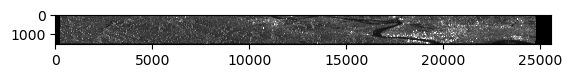

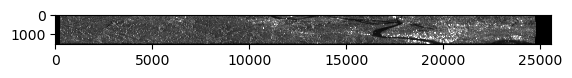

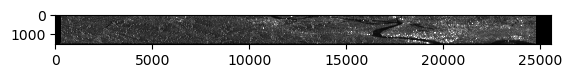

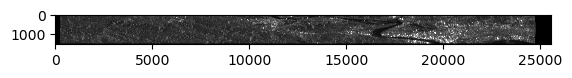

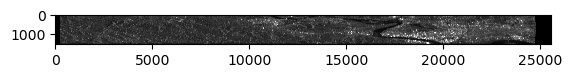

In [85]:
plt.imshow(np.abs(image_1),cmap="gray",vmax= 1/100* np.max(np.abs(image_1)))
plt.show()

plt.imshow(np.abs(image_2),cmap="gray",vmax= 1/100* np.max(np.abs(image_3)))
plt.show()
plt.imshow(np.abs(image_3),cmap="gray",vmax= 1/100* np.max(np.abs(image_2)))
plt.show()
plt.imshow(np.abs(image_4),cmap="gray",vmax= 1/100* np.max(np.abs(image_4)))
plt.show()
plt.imshow(np.abs(image_5),cmap="gray",vmax= 1/100* np.max(np.abs(image_5)))
plt.show()

# Specification de la zone de pixels  

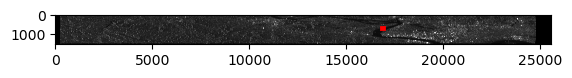

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import numpy as np  # Assurez-vous d'importer la bibliothèque numpy

# Supposons que image_1 est déjà définie

# Définir les limites de la zone à visualiser
sy_start, sy_end = 625, 725
sx_start, sx_end = 16800, 16925

# Extraire la zone spécifiée de l'image
cropped_img = np.abs(image_1[sy_start:sy_end, sx_start:sx_end])  # Assurez-vous d'utiliser np.abs pour une image complexe

# Afficher l'image avec une figure
fig, ax = plt.subplots()

# Afficher l'image
ax.imshow(np.abs(image_1), cmap="gray", vmax=1/60*np.max(np.abs(image_1)))

# Ajouter un marqueur sur la zone spécifiée
rect = patches.Rectangle((sx_start, sy_start), sx_end - sx_start, sy_end - sy_start,
                         linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Afficher la figure
plt.show()


In [87]:
sy = np.s_[625:725] 
sx = np.s_[16800:16925]

#sy = np.s_[600:1200] 
#sx = np.s_[14400:16900]

img1 = image_1[sy, sx]

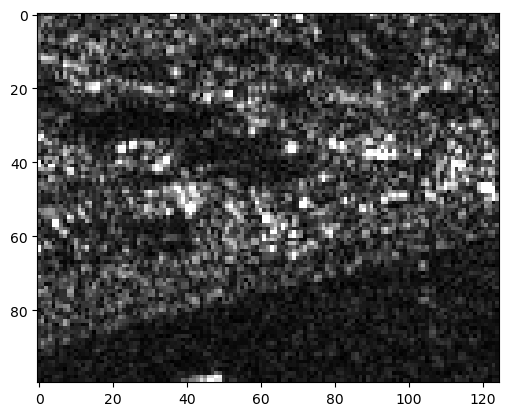

In [88]:
plt.imshow(np.abs(img1),cmap="gray",vmax= 1/5* np.max(np.abs(img1)))
plt.show()

In [89]:
img2 = image_2[sy, sx]

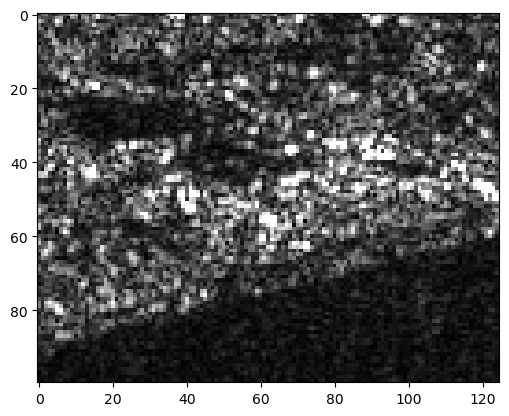

In [90]:
plt.imshow(np.abs(img2),cmap="gray",vmax= 1/5* np.max(np.abs(img2)))
plt.show()

In [91]:
img3 = image_3[sy, sx]


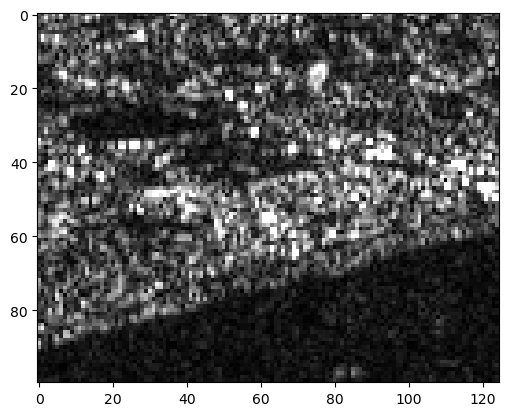

In [92]:
plt.imshow(np.abs(img3),cmap="gray",vmax= 1/5* np.max(np.abs(img3)))
plt.show()


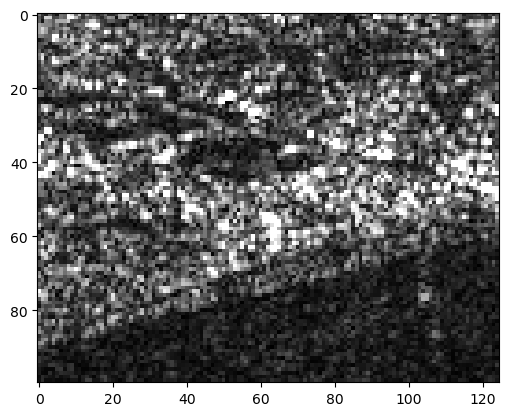

In [93]:
img4 = image_4[sy, sx]
plt.imshow(np.abs(img4),cmap="gray",vmax= 1/5* np.max(np.abs(img4)))
plt.show()

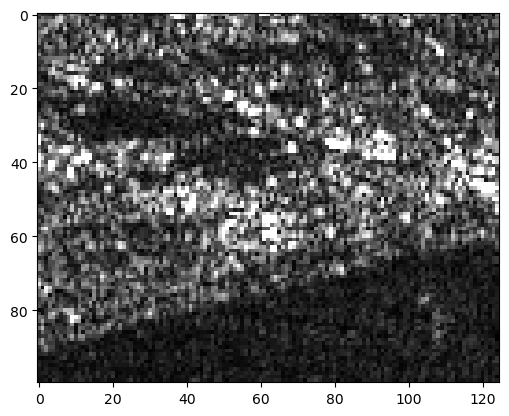

In [94]:
img5 = image_5[sy, sx]
plt.imshow(np.abs(img5),cmap="gray",vmax= 1/5* np.max(np.abs(img5)))
plt.show()

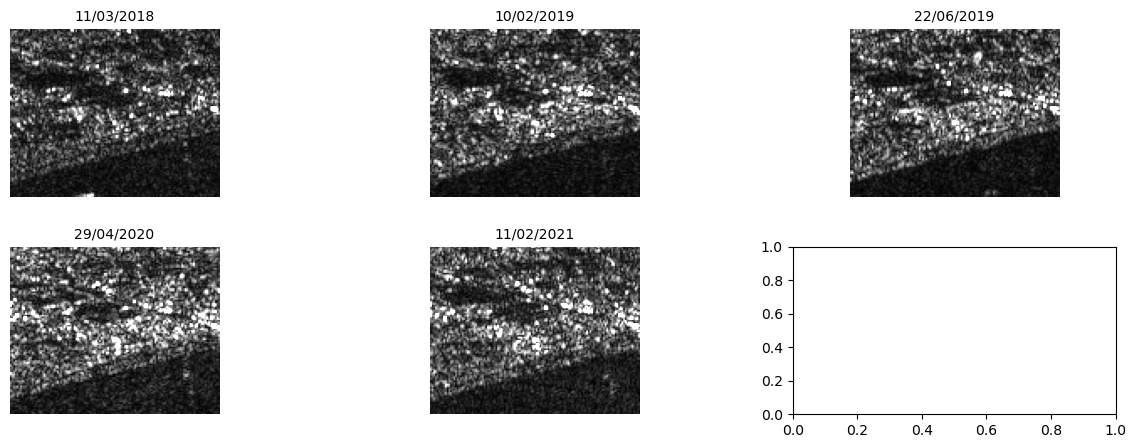

In [95]:
from datetime import datetime

images = [img1, img2, img3, img4, img5]

dates = ["11/03/2018","10/02/2019", "22/06/2019", "29/04/2020","11/02/2021"]

date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, (img, date) in enumerate(zip(images, date_objects)):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(np.abs(img), cmap="gray", vmax=1/5 * np.max(np.abs(img)))
    axes[row_index, col_index].axis('off')  # Désactivez les axes pour une meilleure présentation
    axes[row_index, col_index].set_title(date.strftime("%d/%m/%Y"), fontsize=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


# Forming the ratio image

In [96]:
reference_image = img1
def ratio(img, reference_img):
    # Ajoutez une petite valeur à reference_img pour éviter la division par zéro
    for i in range (np.shape(reference_img)[0]):
        for j in range (np.shape(reference_img)[1]):
             if reference_img[i, j] == 0.+0.j:
                    reference_img[i, j] = 1e-3+0.j               
    return np.clip(img / reference_image, 1e-3, 10)

ratio_img1 = ratio (img2, reference_image)
ratio_img2 = ratio (img3, reference_image) 
ratio_img3 = ratio (img4, reference_image)
ratio_img4 = ratio (img5, reference_image) 

ratio_real1 = np.real(ratio_img1)
ratio_real2 = np.real(ratio_img2)
ratio_real3 = np.real(ratio_img3)
ratio_real4 = np.real(ratio_img4)

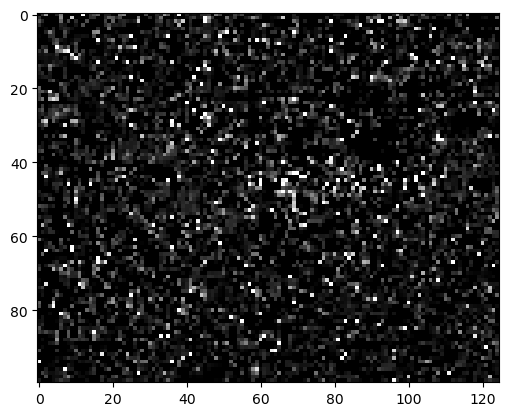

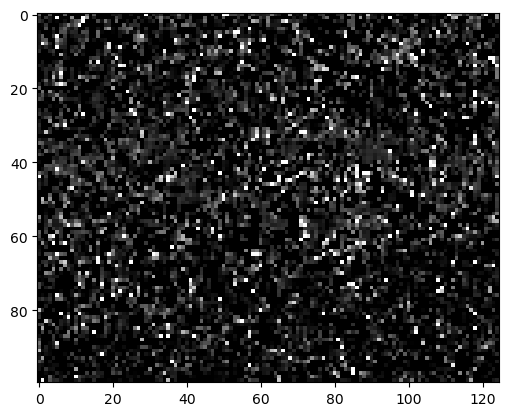

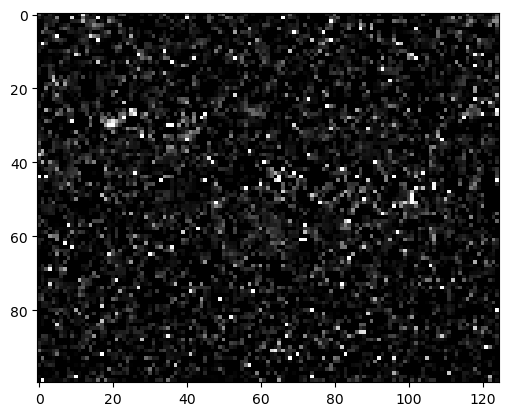

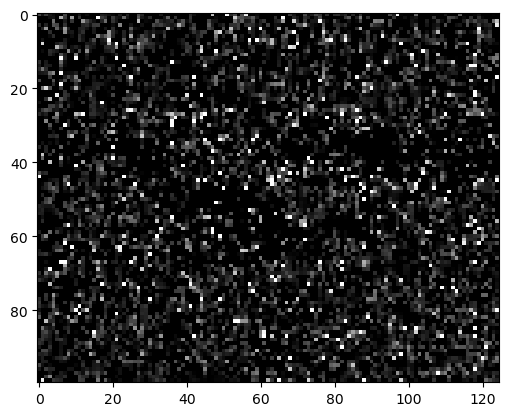

In [97]:
#affichage de l'image ratio: 
plt.imshow(np.abs(ratio_img1),cmap="gray",vmax= 1/7* np.max(np.abs(ratio_img1)))
plt.show()
plt.imshow(np.abs(ratio_img2),cmap="gray",vmax= 1/7* np.max(np.abs(ratio_img2)))
plt.show()
plt.imshow(np.abs(ratio_img3),cmap="gray",vmax= 1/7* np.max(np.abs(ratio_img3)))
plt.show()
plt.imshow(np.abs(ratio_img4),cmap="gray",vmax= 1/7* np.max(np.abs(ratio_img4)))
plt.show()

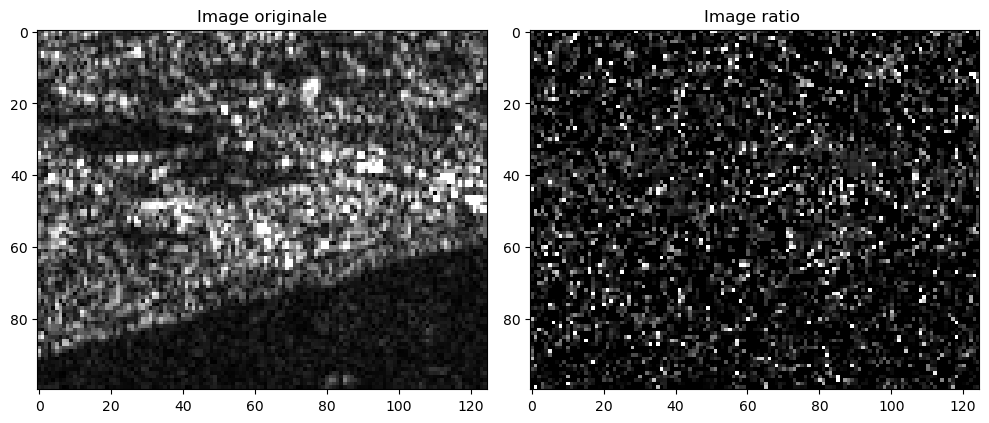

In [98]:
# Affichage de l'image originale (img2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(img3),cmap="gray",vmax= 1/5* np.max(np.abs(img3)))
plt.title('Image originale')

# Affichage de l'image ratio (ratio_img2)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(ratio_img2), cmap="gray", vmax=1/7 * np.max(np.abs(ratio_img2)))
plt.title('Image ratio ')

# Afficher les deux images côte à côte
plt.tight_layout()
plt.show()


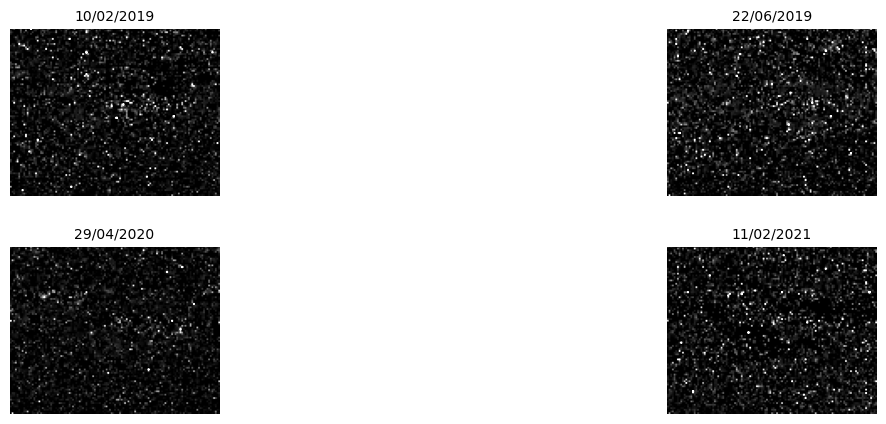

In [99]:
from datetime import datetime

images = [ratio_img1, ratio_img2, ratio_img3, ratio_img4]

dates = ["10/02/2019", "22/06/2019", "29/04/2020","11/02/2021"]

date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, (img, date) in enumerate(zip(images, date_objects)):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(np.abs(img), cmap="gray", vmax=1/5 * np.max(np.abs(img)))
    axes[row_index, col_index].axis('off')  # Désactivez les axes pour une meilleure présentation
    axes[row_index, col_index].set_title(date.strftime("%d/%m/%Y"), fontsize=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


In [100]:
#interpolation
ratio_nn1= list(map(interpolate_nn,tqdm(ratio_real1)))

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 24986.92it/s]


In [101]:
#interpolation
ratio_nn2= list(map(interpolate_nn,tqdm(ratio_real2)))

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 19720.27it/s]


# Denoising

In [102]:
from skimage import io, img_as_ubyte
from skimage.restoration import denoise_tv_bregman
import cv2

In [103]:
# débruitage avec le filtre TV-Bregman (débruitage anisotrope)
image_denoised1 = denoise_tv_bregman(ratio_real1, weight=0.1)
image_denoised2 = denoise_tv_bregman(ratio_real2, weight=0.1)
image_denoised3 = denoise_tv_bregman(ratio_real3, weight=0.1)
image_denoised4= denoise_tv_bregman(ratio_real4, weight=0.1)

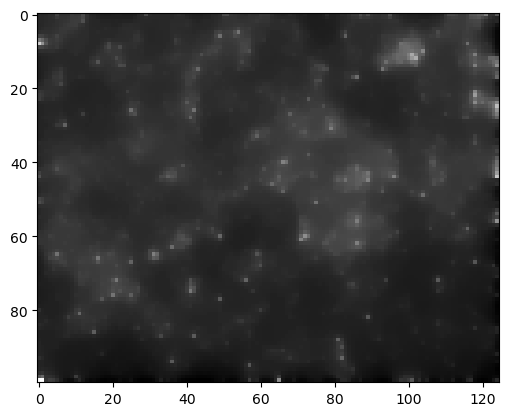

In [104]:
#affichage de l'image débruitée : 
plt.imshow(image_denoised2,cmap="gray",vmax= 1/1.5*np.max(image_denoised2))
plt.show()

# Seuillage

In [105]:
def seuillage(image_gris, seuil):
    _, image_bw = cv2.threshold(image_gris, seuil, 255, cv2.THRESH_BINARY)
    return image_bw

# Appliquer le seuillage
image_bw1 = seuillage(image_denoised1, seuil=0.7)
image_bw2 = seuillage(image_denoised2, seuil=0.7)
image_bw3 = seuillage(image_denoised3, seuil=0.7)
image_bw4 = seuillage(image_denoised4, seuil=0.7)

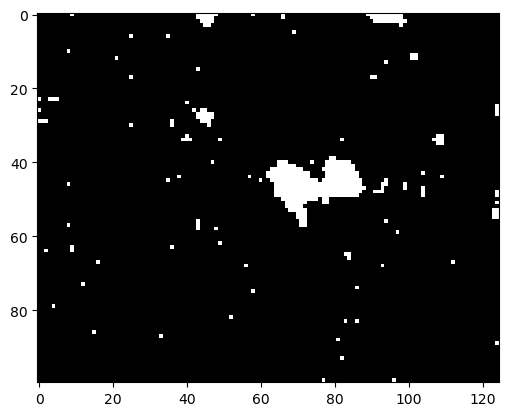

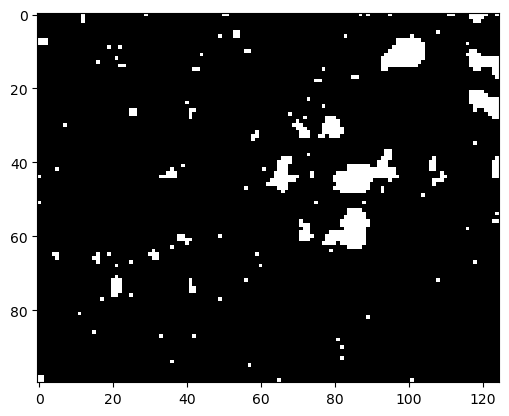

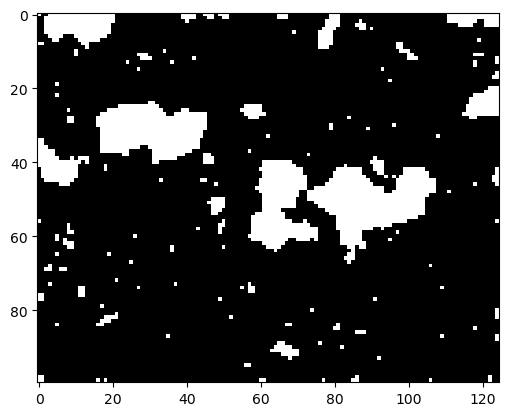

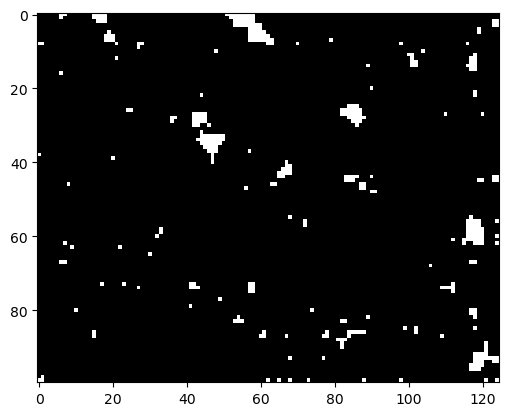

In [106]:
#affichage des images en noir et blanc: 
plt.imshow(image_bw1,cmap="gray",vmax= 1* np.max(image_bw1))
plt.show()
plt.imshow(image_bw2,cmap="gray",vmax= 1* np.max(image_bw2))
plt.show()
plt.imshow(image_bw3,cmap="gray",vmax= 1* np.max(image_bw3))
plt.show()
plt.imshow(image_bw4,cmap="gray",vmax= 1* np.max(image_bw4))
plt.show()



# Zoom sur la zone d'intérêt 

In [107]:
sx2 = np.s_[45:120] 
sy2 = np.s_[30:80]
imgbw1 = image_bw1[sy2, sx2]
imgbw2 = image_bw2[sy2, sx2]
imgbw3 = image_bw3[sy2, sx2]
imgbw4 = image_bw4[sy2, sx2]

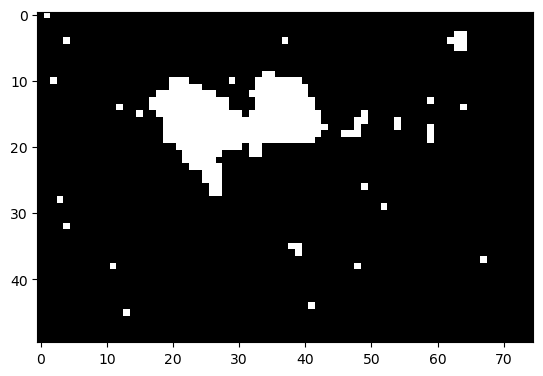

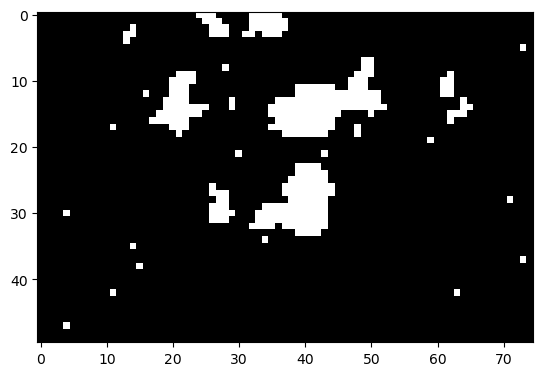

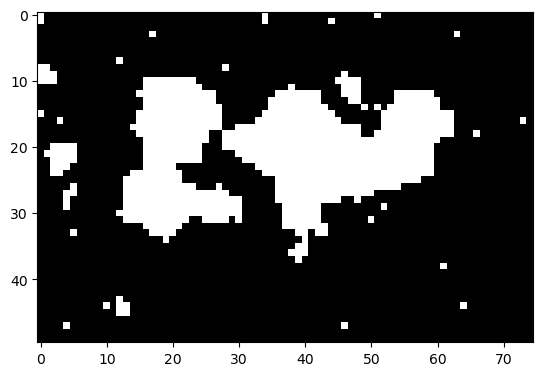

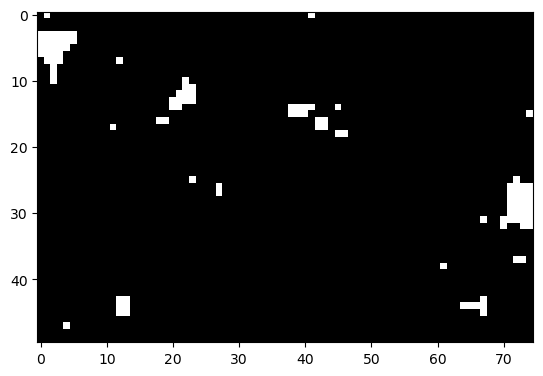

In [108]:
#affichage des images en noir et blanc: 
plt.imshow(imgbw1,cmap="gray",vmax= 1* np.max(imgbw1))
plt.show()
plt.imshow(imgbw2,cmap="gray",vmax= 1* np.max(imgbw2))
plt.show()
plt.imshow(imgbw3,cmap="gray",vmax= 1* np.max(imgbw3))
plt.show()
plt.imshow(imgbw4,cmap="gray",vmax= 1* np.max(imgbw4))
plt.show()

# Enlever les pixels blancs hors de la zone d'intérêt:

In [109]:
from skimage import io, morphology
from skimage.color import rgb2gray

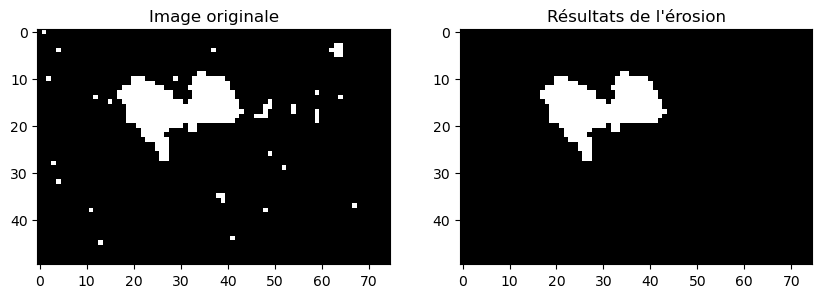

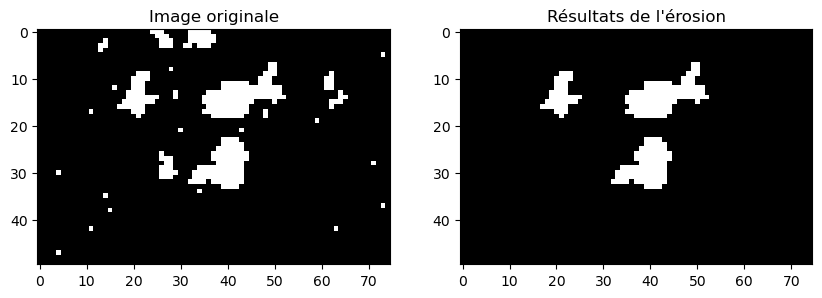

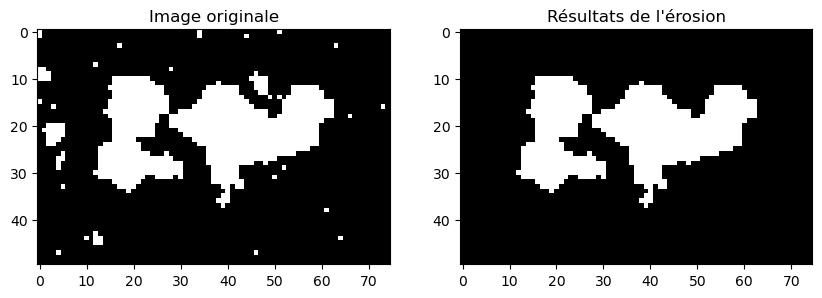

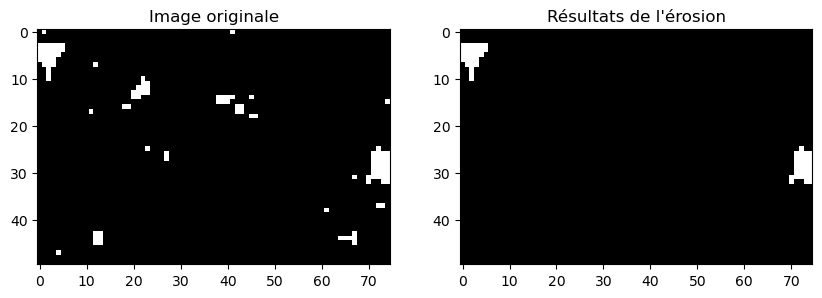

In [110]:
from skimage import morphology, color
import matplotlib.pyplot as plt

def remove_small_spots_skimage(image, min_size):
    # Convertir l'image en niveaux de gris si elle est en couleur
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Binariser l'image
    binary_image = image > 0.5  # Ajustez le seuil selon votre image

    # Utiliser la fonction remove_small_objects
    binary_image_no_small = morphology.remove_small_objects(binary_image, min_size=min_size, connectivity=1)

    # Visualiser les résultats
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Image originale')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_image_no_small, cmap='gray')
    plt.title("Résultats de l'érosion")

    plt.show()

    return binary_image_no_small

min_size = 25  # Remplacez cela par votre propre taille minimale

# Appliquer la fonction sur vos images
binary_image_no_small_1 = remove_small_spots_skimage(imgbw1, min_size)
binary_image_no_small_2 = remove_small_spots_skimage(imgbw2, min_size)
binary_image_no_small_3 = remove_small_spots_skimage(imgbw3, min_size)
binary_image_no_small_4 = remove_small_spots_skimage(imgbw4, min_size)

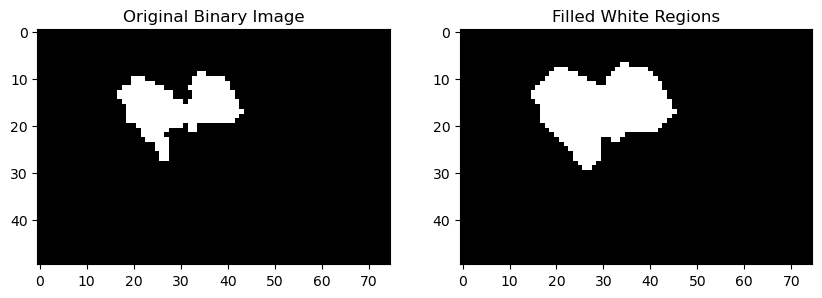

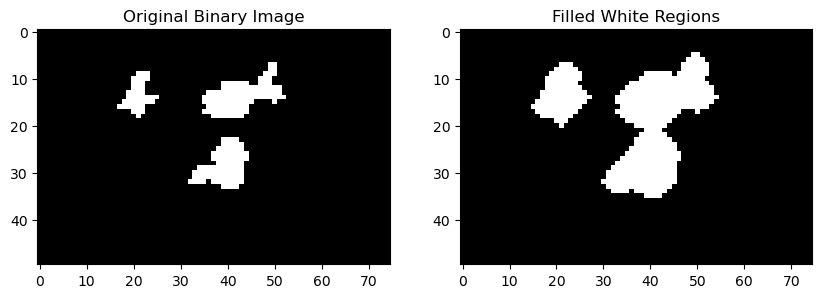

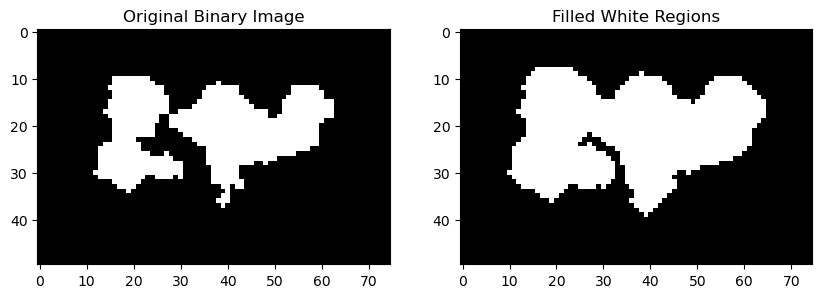

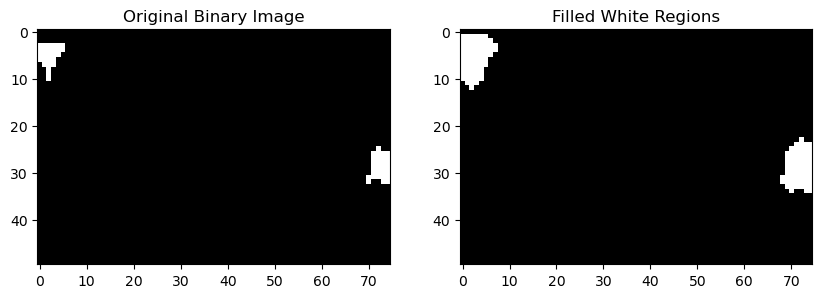

In [111]:
from skimage import morphology, color
import matplotlib.pyplot as plt

def fill_white_regions(image):
    # Convert the image to grayscale if it's in color
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Binarize the image
    binary_image = image > 0.5  # Adjust the threshold according to your image

    # Use binary dilation to fill white regions
    footprint = morphology.disk(2)  # Adjust the disk size as needed
    filled_image = morphology.binary_dilation(binary_image, footprint=footprint)

    # Visualize the results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Original Binary Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filled_image, cmap='gray')
    plt.title('Filled White Regions')

    plt.show()

    return filled_image

# Apply the function to your images
filled_image_1 = fill_white_regions(binary_image_no_small_1)
filled_image_2 = fill_white_regions(binary_image_no_small_2)
filled_image_3 = fill_white_regions(binary_image_no_small_3)
filled_image_4 = fill_white_regions(binary_image_no_small_4)

# Surface de la zone blanche

In [112]:
# Compter le nombre de pixels blancs dans l'image
white_pixel_count1 = np.sum(filled_image_1 == 1)
white_pixel_count2 = np.sum(filled_image_2 == 1)
white_pixel_count3 = np.sum(filled_image_3 == 1)
white_pixel_count4 = np.sum(filled_image_4 == 1)

print("Nombre de pixels de la zone blanche dans la premiere image: {} pixels carrés".format(white_pixel_count1))
print("Nombre de pixels de la zone blanche dans la deuxième image: {} pixels carrés".format(white_pixel_count2))
print("Nombre de pixels de la zone blanche dans la premiere image: {} pixels carrés".format(white_pixel_count3))
print("Nombre de pixels de la zone blanche dans la deuxième image: {} pixels carrés".format(white_pixel_count4))

Nombre de pixels de la zone blanche dans la premiere image: 404 pixels carrés
Nombre de pixels de la zone blanche dans la deuxième image: 472 pixels carrés
Nombre de pixels de la zone blanche dans la premiere image: 1068 pixels carrés
Nombre de pixels de la zone blanche dans la deuxième image: 130 pixels carrés


Dans notre cas de données sentinel-1 IW, la cellule de resolution a la taille de 5*20 m = 100 m²

In [113]:
# Afficher la surface de la zone blanche en pixels carrés
surface1 = white_pixel_count1*100
surface2 = white_pixel_count2*100
surface3 = white_pixel_count3*100
surface4 = white_pixel_count4*100

print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface1))
print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface2))
print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface3))
print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface4))

Surface de la zone blanche dans la premiere image: 40400 mètre carrés
Surface de la zone blanche dans la premiere image: 47200 mètre carrés
Surface de la zone blanche dans la premiere image: 106800 mètre carrés
Surface de la zone blanche dans la premiere image: 13000 mètre carrés


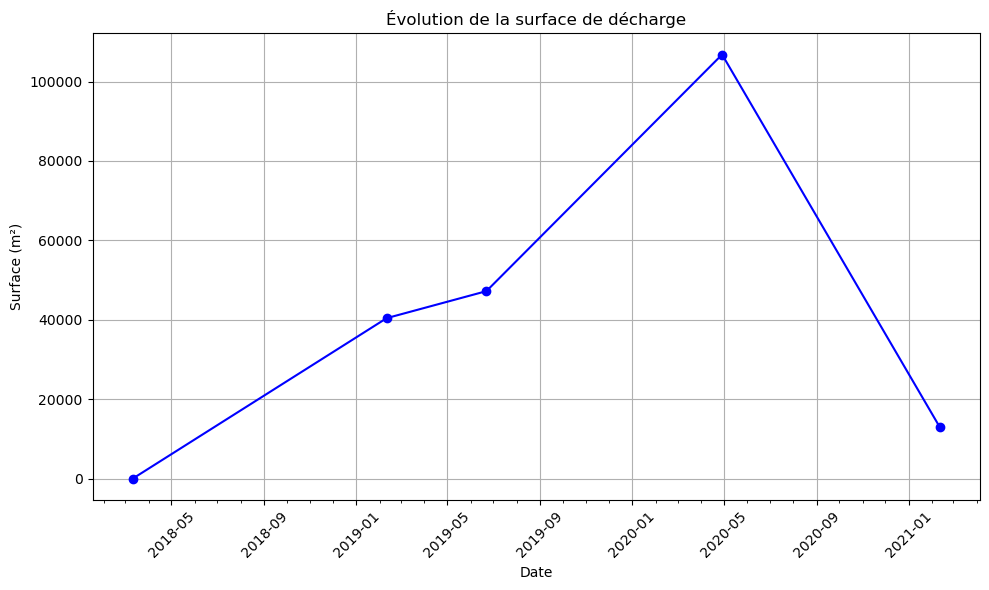

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, MonthLocator

# Supposons que vous avez des données de dates et de surfaces
dates = ["11/03/2018","10/02/2019", "22/06/2019", "29/04/2020","11/02/2021"]

# Conversion des dates en objets datetime
date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

# Supposons que vous ayez des valeurs de surface (remplacez surface1, surface2, etc. par vos valeurs réelles)
surfaces = [0, surface1, surface2, surface3, surface4]

# Tracer l'évolution de la surface en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(date_objects, surfaces, marker='o', linestyle='-', color='b')
plt.title('Évolution de la surface de décharge')
plt.xlabel('Date')
plt.ylabel('Surface (m²)')

# Utiliser AutoDateLocator pour ajuster automatiquement l'échelle des dates
locator = AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(AutoDateFormatter(locator))

# Ajouter les mois à l'axe des x
plt.gca().xaxis.set_minor_locator(MonthLocator())
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


# Estimation du nombre de voitures: 

In [115]:

# Estimation de la surface de voitures en m²
surface_moyenne_voiture = 10

# Estimation du nombre de voitures
nombre_voitures_estime1 = surface1 / surface_moyenne_voiture
nombre_voitures_estime2 = surface2 / surface_moyenne_voiture
nombre_voitures_estime3 = surface3 / surface_moyenne_voiture
nombre_voitures_estime4 = surface4 / surface_moyenne_voiture

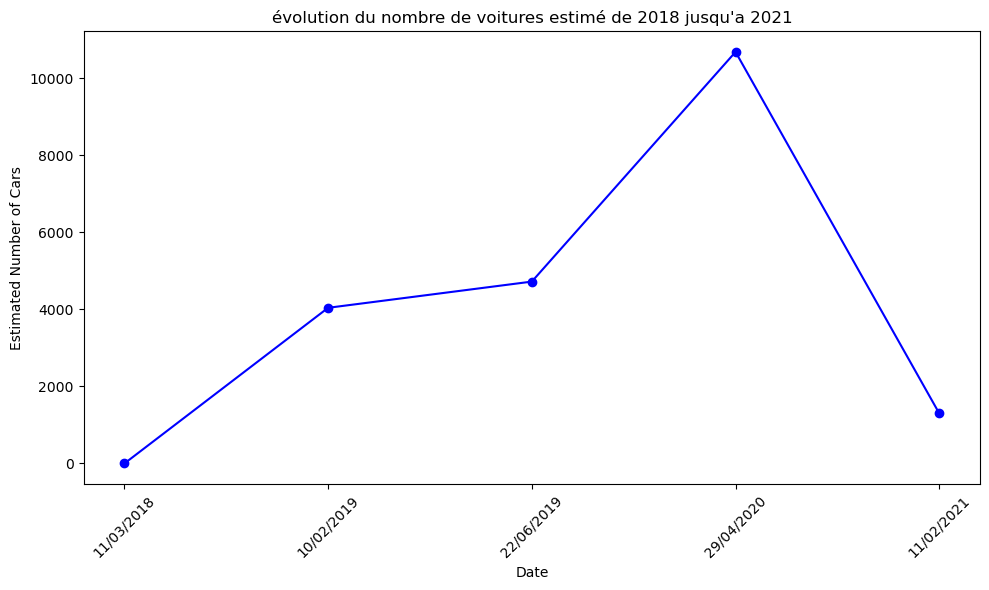

In [116]:
from datetime import datetime

dates = ["11/03/2018","10/02/2019", "22/06/2019", "29/04/2020","11/02/2021"]

data = list(zip(dates, [0,nombre_voitures_estime1, nombre_voitures_estime2, nombre_voitures_estime3,
                         nombre_voitures_estime4]))

data.sort(key=lambda x: datetime.strptime(x[0], "%d/%m/%Y"))

sorted_dates, estimations = zip(*data)

plt.figure(figsize=(10, 6))
plt.plot(sorted_dates, estimations, marker='o', linestyle='-', color='b')
plt.title("évolution du nombre de voitures estimé de 2018 jusqu'a 2021")
plt.xlabel('Date')
plt.ylabel('Estimated Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
